# **COMM475--Performance Measurement**

Instructor: Lorenzo Garlappi &copy; 2024<sup>*</sup>

TA: Tina Xi Tian

<sup>*</sup> <small>These notes are based on Rob Heinkel and Bill Tilford's lecture notes. I am grateful to them for generously sharing this material with me.</small>

**Outline**


**1.   Calculating the "Rate of Return"**
* With Intermediate Valuations

  >> Geometric Average (Time-weighted Return)

* Without Intermediate Valuations

  >> Internal Rate of Return

  >> Modified Dietz Formula

**2.   Performance Measurement from Equilibrium Models**
*   Four CAPM Performance Measures

    >> Sharpe Measure, or Sharpe Ratio ($𝑆R_{𝑝}$)

    >> Jensen Measure ($\sigma_{𝑝}$)

    >> Tracking Error ($TE$)

    >> Information Ratio ($IR$)

*   Portable Alpha
*   The Multiple Risk Factor (MRF) Performance Measure


**3.   Performance Attribution Analysis**

**4.   Assessing TAA Skill: The Merton Model**


# **1.Calculating Rates of Return**

**<u>Basic data</u>**: 

$𝑉_{0}$ and $𝑉_{1}$ are the portfolio values at the start and at the end of the valuation period. $𝐶F_{𝑡}$ is the
client-generated cash flow into (+) or out of (-) the portfolio at date $𝑡$ in $(0,𝑇)$. 

For example, if the client asks for ```$2000``` cash out of the portfolio at date $𝑡 = 3$, then $𝐶F_{3} = −2000$. If there is no cash flow on a date $𝑡$, then $𝐶F_𝑡 = 0$.

Which method is used to calculate the rate of return depends on whether there is a cash flow, besides the basic data above, that affects the value of the portfolio at each date $t$.


**<u>With valuations at cash flow dates</u>**:

When there is intermediate cash flows valuation, we use geometric return.

* **Geometric Return**

Define $𝑉_{𝑡}^{-}$ as the portfolio value just before a cash flow at date $𝑡$ is paid, and $𝑉_{𝑡}^{+} = V_{t}^{-} + CF_{t}$ as the portfolio value just after
the cash flow is paid. 

Then we can calculate the sub-period returns from period $t$ to period $t+1$:

$$r_{t,t+1} = \frac{V_{t+1}^{-}}{V_{t}^{+}}-1$$

Where date $t+1$ follows date $t$, $𝑉_{𝑡}^{+}$ is the portfolio value just after the cash flow at date $t$, and $𝑉_{𝑡+1}^{-}$ is the portfolio value just before the next cash flow at date $t+1$.

The geometric (or time-weighted) return for the whole period from $t=0$ to $t=T$ is:

$$G = (1+ r_{0,1})*(1+r_{1,2})*.....*(1+r_{T-1,T}) - 1$$

**<u>Without valuations at cash flow dates</u>**:

When there is no intermediate cash flows valuation, we use IRR return or  Modified Dietz return.

* **IRR Return**

We solve for IRR return $𝑦$ from the following equation of zero NPV.

$0 = 𝑉_{0} +CF_{1}(1 + 𝑦)^{−1} + 𝐶F_{2}(1 + 𝑦)^{−2}+ . .+𝐶F_{𝑇}(1 + 𝑦)^{−𝑇} − 𝑉_{𝑇}(1 + 𝑦)^{−𝑇}$

where $𝑦$ is the discount rate over the time elapsed between each cash flow date. If the possible cash flow dates are one month apart, then $𝑦$ is a monthly discount rate.

* **Modified Dietz Return**

The Modified Dietz Return calculates the rate of return on a portfolio, taking into account any external cash flows such as deposits or withdrawals during the investment period. 

$$r = \frac{V_{1} - V_{0} - \sum_{t}CF_{t}}{V_{0} + \sum_{t}[(\frac{T-t}{T})CF_{t}]}$$

To summarize, the Geometric return revalues all cash flows after the cash flows are received; IRR return and the Modified Dietz return do not revalue intertemporal cashflows received. 



We can use the following functions to calculate the geometric return, IRR return, and modified dietz return.

In [1]:
# install the package numpy-financial which allows us to calculate IRR return.
!pip install numpy-financial

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy_financial as npf
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
### Calculate returns using different methods ###

### 1). Geometric return ###
# function input is a list of interest rate from time 0 to time T
def geom_ret(returnlist):
  G = 1
  for i in range(len(returnlist)):
    G = G*(1+returnlist[i])

  return G-1

# example for Geometric return 
returnlist = [0.1,0.12,0.15]
print(f"Geometric return: {geom_ret(returnlist)*100:.2f}%")


### 2). IRR return ###
# Cash flows input
cash_flows = [-100, 20, 30, 40, 50]

# Calculate IRR using numpy.irr() function
irr = npf.irr(cash_flows)
print(f"IRR: {irr*100:.2f}%")


### 3). Modified Dietz return ###
# function input:
# beginning_value: Initial value of the investment
# ending_value: Value of the investment at the end of the period
# net_flows: a list of net cash flows during the period (negative for outflows)
def modified_dietz_ret(beginning_value, ending_value, net_flows):
    if len(net_flows) == 0:
        return (ending_value - beginning_value) / beginning_value
    elif len(net_flows) == 1:
        return (ending_value - beginning_value - net_flows[0]) / (beginning_value + net_flows[0])
    else:
        return (ending_value - beginning_value - sum(net_flows)) / (beginning_value + sum(net_flows[t]*(1-t/len(net_flows)) for t in range(len(net_flows))))

# example for Modified Dietz return
beginning_value = 10000  # Initial value of the investment
ending_value = 12000     # Value of the investment at the end of the period
net_flows = [-1000,1000]        # Net cash flows during the period (negative for outflows)

md_return = modified_dietz_ret(beginning_value, ending_value, net_flows)
print(f"Modified Dietz Return: {md_return:.2%}")


Geometric return: 41.68%
IRR: 12.83%
Modified Dietz Return: 21.05%


# **1.1 Calculating Rates of Return - An Example with Intermediate Valuations**

Now we look at an example with intermediate valuations. We calculate the Geometric return, the IRR return, and the Modified Dietz return and then compare the differences. 

Given the following cashflow schedules over 1 month (days from 0 to 30):

| Time (t)          | Investment Value (V)       | Cash Flow (CF)    |
|-------------------|----------------------------|-------------------|
| t = 0             | $V_{0} = 10,000 $          | -                 |
| t = 9             | $ V_{9}^{-} = 11,500 $     | $ CF_{9} = 3,000 $ |
| t = 22            | $ V_{22}^{-} = 13,800 $    | $ CF_{22} = -2,000 $ |
| t = 30            | $ V_{30} = 12,200 $        | -                 |


Next we calculate the Geometric return, IRR return, and the Modified Dietz return.


**Geometric Return**

*all returns are calculated monthly*

$V_{9}^{+} = 11,500 + 3,000 = 14,500$

$V_{22}^{+} = 13,800 - 2,000 = 11,800$

$r_{0,9} = \frac{V_{9}^{-}}{V_{0}^{+}} - 1 =\frac{11,500}{10,000} - 1 = 0.1500$

$r_{9,22} = \frac{V_{22}^{-}}{V_{10}^{+}} - 1= \frac{13,800}{14,500}-1 = -0.0483$

$r_{22,30} = \frac{V_{30}^{-}}{V_{23}^{+}} - 1= \frac{12,200}{11,800} - 1 = 0.0339$

$G = (1.1500)*(0.9517)*(1.0339) - 1 = 0.1316$



The Geometric return can be calculated with the following code.

In [4]:
# calculate geometric return
returnlist = [0.15,-0.0483,0.0339]
print(f"Geometric return: {geom_ret(returnlist)*100:.2f}%")

Geometric return: 13.16%


**IRR Return**

Now we calculate the IRR return as if no intermediate valuations. That is, we only consider the starting valuation $V_{0}$, ending valuation $V_{T}$ and intrmediate cash flows $CF_{t}$. We do not consider the intermediate valuations $V_{t}$.

$0 = V_{0} + CF_{9}(1+y)^{-9/30} + CF_{22}(1+y)^{-22/30} - V_{30}(1+y)^{-30/30}$ 

That is:

$0  = 10,000 + 3,000(1+y)^{-9/30} - 2,000(1+y)^{-22/30} - 12,200(1+y)^{-30/30}$

The yield $y$ is solved as: $y = 0.104$.

The IRR return is calculated with the code below.

In [5]:
### IRR return
# npf.irr([-V0,CF1,CF2,--,(CFT+VT)],digits)

### irr function implemented in numpy-financial assumes data with yearly frequency
### when we have monthly or daily frequency data, we need transform yearly returns from npf.irr to the respective frequences

# IRR from period 0 to period 30

# cashflows
flow = np.zeros(31)
flow[0] = 10000
flow[9] = 3000
flow[22] = -2000
flow[30] = -12200

# define a function to transform yearly IRR to daily IRR: when the number of days in a month is 30
def IRR_d30(irr_y):
  return (1 + irr_y) ** (30) - 1

# IRR return from period 0 to period 30:
print(f"IRR return: {IRR_d30(round(npf.irr(flow), 4))*100:.1f}%")

IRR return: 10.4%


**Modified Dietz Return**

The Modified Dietz return is calculated as:

$r = \frac{12,200 - 10,000 - (3,000 - 2,000)}{10,000 + (\frac{21}{30})(3,000) - (\frac{8}{30})(2,000)} = \frac{1,200}{11,566.67} = 0.104$

The code below calculates the Modified Dietz return.

In [6]:
### . Modified Dietz return
# function input:
# beginning_value: Initial value of the investment
# ending_value: Value of the investment at the end of the period
# net_flows: a list of net cash flows during the period (negative for outflows)

# example
beginning_value = 10000  # Initial value of the investment
ending_value = 12200     # Value of the investment at the end of the period

#net cash flows
net_flows = np.zeros(31)
net_flows[9] = 3000
net_flows[22] = -2000

md_return = modified_dietz_ret(beginning_value, ending_value, net_flows)
print(f"Modified Dietz Return: {md_return:.1%}")

Modified Dietz Return: 10.4%


Note that in this example, the geometric return is 0.1316, the IRR return and the modified dietz return are the same: 0.104. The IRR return and the Modified Dietz return are smaller than the Goemetric return because we do not take into account the intermediate valuations of $V_{t}$.

The Geometric return is the "correct" return, but if we do not have intermediate valuations then we must use the IRR or the Modified Dietz return. The IRR has the problem of multiple solutions. The Modified Dietz method is the most commonly used technique.

Note that in all these calculations, we assume any investment cash flows, like dividends or interest, are kept in the portfolio and reinvested, so show up in $𝑉_{T}$.

# **1.2 Calculating Rates of Return - An Example without Intermediate Valuations**

We look at another example without intermediate valuations over 1 month. Now the number of days in this example is 31.

We calculate the IRR return and the Modified Dietz return and compare the two returns.

The cash flow schedules are:

| Time (t)          | Investment Value (V)       | Cash Flow (CF)        |
|-------------------|----------------------------|-----------------------|
| t=0               | $ V_{0} = 100 $            | -                     |
| t=10              |                            | $ CF_{10} = +30 $     |
| t=12              |                            | $ CF_{12} = -50 $   |
| t=18              |                            | $ CF_{18} = +20 $   |
| t=24              |                            | $ CF_{24} = -10 $   |
| t=31              | $ V_{31} = 106 $           | -                     |



**IRR Return**

We calculate the IRR return. 

$0 = 𝑉_{0} +CF_{1}(1 + 𝑦)^{−1} + 𝐶F_{2}(1 + 𝑦)^{−2}+ . .+𝐶F_{𝑇}(1 + 𝑦)^{−𝑇} − 𝑉_{𝑇}(1 + 𝑦)^{−𝑇}$

That is:

$0 = 100 + 30(1 + 𝑦)^{−10/31} - 50(1 + 𝑦)^{−12/31} + 20(1+y)^{18/31} - 10(1+y)^{24/31} − 106(1 + 𝑦)^{−31/31}$

We solve the yield $y$ is: 

$y = 0.167$.

The code below calculates the IRR return when the number of days is 31 in a month.

In [7]:
### define a function to transform IRR to yearly IRR -> if number of days in a month is 31
def IRR_d31(irr_y):
  return (1 + irr_y) ** (31) - 1

flow = np.zeros(32)
flow[0] = 100
flow[10] = 30
flow[12] = -50
flow[18] = 20
flow[24] = -10
flow[31] = -106

# IRR return from period 0 to period 31:
print(f"IRR return: {IRR_d31(round(npf.irr(flow), 4))*100:.1f}%")

IRR return: 16.7%


**Modified Dietz Return**

We calculate the Modified Dietz return.

$r = \frac{106-100-(30-50+20-10)}{100+(\frac{21}{31})(30) - (\frac{19}{31})(50)+(\frac{13}{31})(20) - (\frac{7}{31})(10)} = \frac{16}{95.81} = 0.167$

The code below calculates the Modified Dietz return.

In [8]:
### . Modified Dietz return
# function input:
# beginning_value: Initial value of the investment
# ending_value: Value of the investment at the end of the period
# net_flows: a list of net cash flows during the period (negative for outflows)

# Example usage:
beginning_value = 100  # Initial value of the investment
ending_value = 106     # Value of the investment at the end of the period
flow = np.zeros(32)
flow[10] = 30
flow[12] = -50
flow[18] = 20
flow[24] = -10

md_return = modified_dietz_ret(beginning_value, ending_value, flow)
print(f"Modified Dietz Return: {md_return:.1%}")

Modified Dietz Return: 16.7%


In this numerical example, IRR and the Modified Dietz return are exactly the same. However, each method has issues:

The IRR method can have multiple solutions, which means NONE of the solutions are “correct”. 
On the other hand, the Modified Dietz method adds/subtracts dollars that occur at different points in time, which violates the
“time value of money”. But, it is comforting when both methods give the same result.

Next we simulate the relationship between IRR return and NPV and illustrate scenarios when the IRR has multiple solutions.

Scenario 1. There is only one solution for IRR.

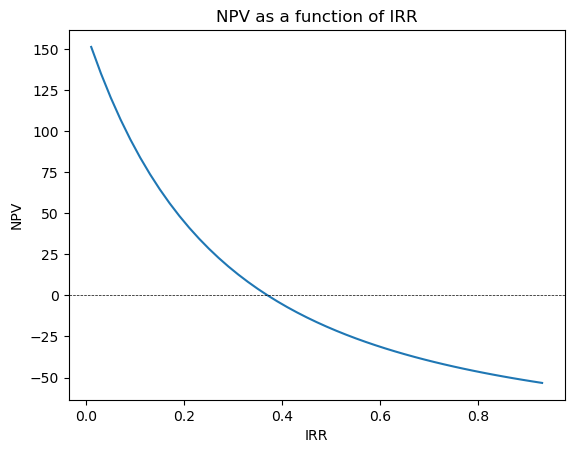

In [9]:
### Scenario (1). There is only one solution for IRR ###

# Define the cash flows
cash_flows = [-100, 50, 40, 30, 20,120]

# Calculate NPV at a discount rate of 10%
IRR = np.arange(0.01,0.95,0.02)
NPV = []
for irr in IRR:
    npv = npf.npv(irr, cash_flows)
    NPV.append(npv)

# Plot the NPV as a function of IRR
fig, ax = plt.subplots()
ax.plot(IRR, NPV)
ax.axhline(0, color='black', lw=0.5,linestyle='--')
ax.set_xlabel('IRR')
ax.set_ylabel('NPV')
ax.title.set_text('NPV as a function of IRR')
plt.show()


Scenario 2. There are two solutions for IRR.

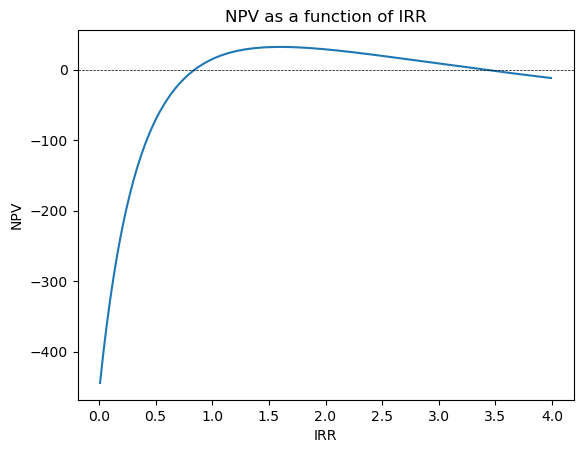

In [10]:
### Scenario (2). There are two solutions for IRR ###

# Define the cash flows
cash_flows = [-160, 1000, -1300]

# Calculate NPV
IRR = np.arange(0.01,4,0.02)
NPV = []
for irr in IRR:
    npv = npf.npv(irr, cash_flows)
    NPV.append(npv)

# Plot the NPV as a function of IRR
fig, ax = plt.subplots()
ax.plot(IRR, NPV)
ax.axhline(0, color='black', lw=0.5,linestyle='--')
ax.set_xlabel('IRR')
ax.set_ylabel('NPV')
ax.title.set_text('NPV as a function of IRR')
plt.show()

Scenario 3. Even though there is only one solution for IRR, the NPV becomes insensitive to the IRR after reaching a certain point.

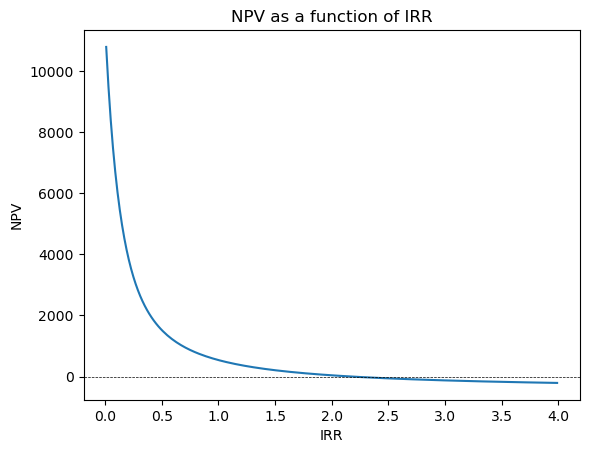

In [11]:
### Scenario (3). There is only one solution for IRR ###
### but the NPV is insensitive to the IRR after reaching a certain point ###

# Define the cash flows
cash_flows = [-460, 1000, 1000, 1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]

# Calculate NPV
IRR = np.arange(0.01,4,0.02)
NPV = []
for irr in IRR:
    npv = npf.npv(irr, cash_flows)
    NPV.append(npv)

# Plot the NPV as a function of IRR
fig, ax = plt.subplots()
ax.plot(IRR, NPV)
ax.axhline(0, color='black', lw=0.5,linestyle='--')
ax.set_xlabel('IRR')
ax.set_ylabel('NPV')
ax.title.set_text('NPV as a function of IRR')
plt.show()

# **2. CAPM Performance Measures**

In this section, we show how a professional performance measurement firm would display a manager's portfolio results to their institutional clients.

# **2.1 CAPM Performance Measures - The CAPM Performance Measures**

**The CAPM model** is defined by: 
$$r_{p} - r_{f} = \alpha_{p} + \beta_{p}(r_{m} - r_{f}) + e_{p}$$

Where $𝑟_{𝑝}$ is the fund return and $e_{p}$ is unsystematic return, which has an expected value of zero.

The excess return on portfolio $p$,  $𝑟_{𝑝} − 𝑟_{𝑓}$, can be decomposed into two components:

(i) a systematic return, $\beta_{𝑝}*(r_{m}− 𝑟_{𝑓})$

(ii) a residual return, $\alpha_{𝑝} + 𝑒_{𝑝}$. The residual return consists of a skill component alpha $(\alpha_{𝑝})$ and a luck component $(𝑒_{𝑝})$.

It is often very hard to separate the skill $(\alpha_{𝑝})$ from the luck $(𝑒_{𝑝})$.

If one buys the market portfolio, $m$, with $𝛽_{𝑚} = 1$, then, by definition $\alpha_{𝑚} = 0$. Alpha is usually termed “value added” and is, by definition, zero in the market portfolio.

CAPM performance measures can be derived from a regression of excess portfolio return, $(𝑟_{𝑝} − 𝑟_{𝑓})$, on excess market return $(r_{m} - r_{f})$. This yields: $\beta_{𝑝}$, the estimate of the portfolio's systematic risk, and $\alpha_{𝑝}$, the portfolio's estimated value added and $𝑤_{𝑝} = \text{StdDev}(𝑒_{p})$, termed tracking error, or residual risk.

Alpha ($\alpha_{𝑝}$) is the distance above the ex-post Security Market Line (SML), which is $\beta_{p}(r_{m} - r_{f})$ for a portfolio with systematic risk $\beta_{𝑝}$.

There are seven performance measures under CAPM framework:

1.   **Average raw return**: $E[𝑟_{𝑝}]$. It makes NO adjustment for risk.
  
2.   **Average excess return**: $E[𝑟_{𝑝} − 𝑟_{𝑓}]$.

3.   **Standard deviation (of excess return)**: $\sigma_{𝑝} = \text{StdDev}(𝑟_{𝑝} − 𝑟_{𝑓})$, or total return volatility.
  
4.   **Sharpe ratio**, $𝑆R_{𝑝} = \frac{E[𝑟_{𝑝}−𝑟_{𝑓}]}{\sigma_{p}}$.This is the total return reward-to-risk measure.

5.   **Alpha**, $\alpha_{p} = E[r_{p} - r_{f}] - \beta_{p} * E[r_{m} - r_{f}]$.

        This is called "excess return", or “security selection value-added".

6.   **Tracking error** is $w_{p} = \text{StdDev}(e_{p})$, also called residual risk.
    
        This is the risk due to the manager NOT holding the market portfolio, and so taking extra “risk” over and above the risk of holding the market portfolio.

7.   **Information ratio** is $\text{IR}_{p} = \frac{E[r_{p} - r_{f}] - \beta{p}*E[r_{m} - r_{f}]}{w_{p}} = \frac{\alpha_{p}}{w_{p}}$.

        This is the value-added return reward-to-risk measure. This omits any return or risk from the benchmark (the market portfolio) and only looks at the reward and risk from the manager's skill.

        A low $𝑆R_{𝑝}$ or $IR_{𝑝}$ can come from a low return (numerator) and/or a high risk (denominator).

The Sharpe Ratio $SR_{p}$ includes both systematic and unsystematic return/risk. The Information Ratio $IR_{p}$ extracts from that the systematic return/risk and only focuses on the unsystematic return /risk, i.e., return/risk due to manager luck/skill.

The following functions are defined to calculate the seven performance measures.

In [12]:
### Performance measures

# 1: average raw return
# retlist is a list of returns
def raw_ret(retlist):
  return np.mean(retlist)

# 2: average access return
# r: list of returns
# rf: risk free rate
def access_ret(r,rf):
  return np.mean(r-rf)

# 3. standard deviation
# r: list of returns
# rf: risk free rate
def std_dev(r,rf):
  return np.std(r-rf)

# 4. sharp ratio
# r: list of returns
# rf: risk free rate
def sharp_ratio(r,rf):
  return np.mean(r-rf)/np.std(r-rf)

# 5: alpha
# r: list of returns
# rm: market return
# rf: risk free rate
# beta: beta of the portfolio
def alpha(r,rm,rf,beta):
  return (r-rf) - beta*(rm-rf)

# 6: tracking error
# e: list of errors
def track_err(e):
  return np.std(e)

# 7.information ratio
# alpha: alpha of the portfolio
# w: tracking error
def info_ratio(alpha,w):
  return alpha/w


**The CAPM Performance Measures - An Example**



Now we look at an example to understand the CAPM performance measures. 

Consider two Canadian equity managers (A \& B) and the benchmark index Toronto Stock Index (TSX) (M):

Manager | $$E[r_{p}-r_{f}]$$| $\beta_{p}$ | $\sigma_{p}$ | $w_{p}$
--------|-------------------|-------------|--------------|--------
A       | 0.04 | 0.50 | 0.11 | 0.09
B       | 0.08 | 1.3  | 0.18 |0.03
M       | 0.07 | 1.0  | 0.14 |0.00

where:

* $E[r_{p}-r_{f}]$ is average excess return.

* $\beta_{p}$ is the systematic risk, the $\beta$ of the portfolio.

* $\sigma_{p}$ is the total risk of the portfolio.

* $w_{p}$ is the tracking error.


Now we use the risk and performance measures to compare the performance of the two managers with the benchmark index.

1.   <u>By raw (or excess) returns</u>: B > M > A

2.   <u>By sharpe ratio</u>: M > B > A

>> Sharp ratio is the average excess return per unit of total risk $SR_{P} = \frac{E[r_{p} - r_{f}]}{\sigma_{p}}$

>> >> A: $SR_{A} = \frac{0.04}{0.11} = 0.364$

>> >> B: $SR_{B} = \frac{0.08}{0.18} = 0.444$

>> >> M: $SR_{M} = \frac{0.07}{0.14} = 0.500$

1.   <u>By alpha</u>: A > M > B

>> Manager value-added $\alpha_{p} = E[r_{p} - r_{f}] - \beta_{p}*E[r_{m} - r_{f}]$

>> >> A: $\alpha_{A} = 0.04 - 0.05*0.07 = 0.005$, above the SML.

>> >> B: $\alpha_{B} = 0.08 - 1.3*0.07 = -0.011$, below the SML.

>> >> M: $\alpha_{M} = 0.07 - 1.0*0.07 = 0$, on the SML by definition.

4.   <u>By information ratio</u>: A > B > M

>> Alpha per unit of tracking error $IR_{P} = \frac{\alpha_{p}}{w_{p}}$

>> >> A: $IR_{A} = \frac{0.005}{0.09} = 0.056$.

>> >> B: $IR_{B} = \frac{-0.011}{0.03} = -0.367$.

>> >> M: $IR_{M} = 0$.

Now we further evaluate the performance measures of the two managers (A and B) in above example and we compare the two managers' performance with a "passive" investment in the stock market (M).

**1. Raw (or excess) returns**

Manager B did better than the index (M) and manager A did worse than the index (M). But, this measure does not look at the risk of the portfolios.

**2. Risk**

* **Total risk of the portfolio: $\sigma_{p}$**

To get the highest average return, manager B had both the highest systematic risk $(\beta_{𝐵})$ and the
highest total risk $(\sigma_{𝐵})$.

* **Tracking error: $𝑤_{𝑝}$**

Manager B had the lowest tracking error $𝑤_{𝑝}$, meaning that manager B behaved more like a leveraged $(\beta_{𝑝} > 1)$ investment than manager A did.

**3. Reward to risk**

* **Sharpe ratio: $SR_{p}$**

The reward-to-risk measure, the sharpe ratio ($SR_{p}$), compares excess (over $r_{f}$) return to the total risk of the manager. Manager B beats manager A: B has more total risk, but also adds proportionally more return. 
So, $𝑆R_{𝐵} >𝑆R_{𝐴}$, i.e., manager B achieved a higher total return per unit of total risk than manager A did.

* **Information ratio: $IR_{P}$**

The sharpe ratio considers excess return and total risk. We can assess managerial talent that is NOT due to taking different systematic risks by comparing alphas to tracking error, which is the risk taken over and above the systematic risk. The information ratio can be interpreted as a measure of "security selection reward versus risk".

Manager A beats manager B with information ratio: manager A adds proportionally more value (alpha) per unit of tracking error than manager B does. 

**4. Alpha: $\alpha_{p}$**

Manager B has a negative alpha: $\alpha_{𝐵} = −0.011$. If the investor had borrowed ```$0.30``` and invested that, plus ```$1``` of her own money (so, invested ```$1.30```) in the market index, M, she could have earned an excess return of $(1.3)*(0.07)=0.091$. If she invested with manager B, who had a beta of 1.3, but only earned $E[r_{p} - r_{f}]= 0.08$,
she will earn a worse return of $\alpha_{B}$ ($-0.011 = 0.08 - 0.091$).

**Conclusion**

Manager B has a better total return reward-to-risk (sharpe ratio). But manager B has a very high systematic risk exposure, $\beta$, i.e., has a low tracking error. And, when manager B does security selection, they did poorly, with a negative alpha.

Manager A has a better $\alpha$, but has lots of tracking error (extra risk) to earn their $\alpha$. This lowers manager A’s sharpe ratio.


# **2.2 CAPM Performance Measures - Portable Alpha**

In this section we show that a client can "undo" any systematic risk in a portfolio but can still capture all the value-added ($\alpha$). This ability is called "portable alpha".

We consider three investments:

(i) invest $𝑋_{𝐴}$ in manager A, who has a systematic risk of $\beta_{𝐴}$ and an expected return of $𝐸[𝑟_{𝐴}] = \alpha_{𝐴} + 𝑟_{𝑓} + \beta_{𝐴}(𝐸[𝑟_{𝑚} - r_{f}])$.  

(ii) invest $𝑋_{𝑀}$ in the market portfolio, with $\beta_{𝑀} = 1$ and expected return $𝐸[𝑟_{m}]$.

(iii) invest $(1 − 𝑋_{𝐴} − 𝑋_{𝑀})$ in T-Bills to earn $r_{f}$.

If we set our portfolio $\beta$ to zero: 

$$0 = 𝑋_{𝐴}*\beta_{𝐴} + 𝑋_{𝑀}*1 + (1-X_{A} - X_{M})*0$$

or, equivalently:

$$X_{M} = - X_{A}*\beta_{A}$$

The expected return on this portfolio is:

$$E[r_{p}] = X_{A}*E[r_{A}] + X_{M}*E[r_{m}] + (1-X_{A} - X_{M})*r_{f}$$

We substitute $X_{M} = - X_{A}*\beta_{A}$ into the expected return, we have:

$$E[r_{p}] = r_{f} + X_{A}*\sigma_{A}$$

We short the stock index (a negative $𝑋_{𝑀})$ to eliminate systematic risk. We keep as much of the manager's alpha ($\alpha_{A} = X_{A}\sigma_{A}$) because a bigger $𝑋_{𝐴}$ (and so a more negative $𝑋_{𝑀})$ means more $\alpha_{𝐴}$ in our portfolio return.

# **2.3 CAPM Performance Measures - The Multiple Risk Factor (MRF) Performance Measure**

Instead of using the CAPM as our return/risk model, we could use a Multiple Risk Factor (MRF) model. The return generating function and the expected return equations for this model are:

<u>Ex-post</u>: $r_{p} = E[r_{p}] + \beta_{1p}I_{1} + \beta_{2p}I_{2} + e_{p}$

> where $\beta_{1p}I_{1} + \beta_{2p}I_{2}$ is the return from the systematic risk and $e_{p}$ is the return from unsystematic risk.

<u>Ex-ante</u>: $E[r_{p}] = r_{f} + \lambda_{1} \beta_{1p} + \lambda_{2}\beta_{2p}$

To obtain the multifactor value-added:

1.   Define the risk factors and observe the shocks, $𝐼_{1}$, $𝐼_{2}$, over a time period. For example, $𝐼_{1}$ could be shocks to $GDP$ and $𝐼_{2}$ could be changes in the 10-year $GOC$ (government over corporate) yield.

2.   $N$ portfolios are formed. For each portfolio, $p$, observe the portfolio return, $𝑟_{𝑝}$, over the same time period as the risk factor shocks were observed. These portfolios could differ by market cap, or sector, but they should all be well-diversified.

3.   For each portfolio, $p$, do a time-series regression: $𝑟_{𝑝} = \alpha_{𝑝} + \beta_{1p}𝐼_{1} + \beta_{2𝑝}𝐼_{2} + 𝑒_{𝑝}$ and record the results:
$\alpha_{𝑝}$, $\beta_{1𝑝}$, $\beta_{2𝑝}$.

1.   Do a cross-sectional regression across $N$ portfolios:
$$E[r_{p}] = \alpha_{p} + \lambda_{1}\beta_{1p} + \lambda_{2}\beta_{2p}$$

Using the $E[r_{p}]$ from step 2 and the $\beta_{1p}$, $\beta_{2p}$ from step 3. The results give estimates of the market prices of risk, $\lambda_{1}$, $\lambda_{2}$ and the estimate of $\alpha_{𝑝}$ will be $𝑟_{𝑓}$.

5.   Calculate a portfolio's value added:

$$VA_{p} = E[r_{p}] - (r_{f} + \lambda_{1}\beta_{1p} + \lambda_{2}\beta_{2p})$$

> with the $\beta_{1p}$, $\beta_{2p}$ from step 3 and the $\lambda_{1}$, $\lambda_{2}$ from step 4.

As with the CAPM value added, this provides the return on the portfolio, in excess of an equivalent-risk, passive investment.


# **3. Performance Attribution Analysis (AA)**

Attribution analysis (AA) is a technique used to decompose a fund’s total return into components, one component is attributable to the client’s decisions and the rest of components are due to the manager’s decisions. The data we need are given in the following table:


**Total Fund Return (C) $\times $ (D) =7.99%**


|               |                |  Weights|                       | Returns               |     | Total furnd return    |    
|---------------|----------------|:----------:|--------------------|:---------------------:|-----|-----:|
|               | (A)              | (B)           | (C)           | (D)                 | (E)        | (C) $\times$ (D)        |   
| Asset Class   | Median Fund | Fund Policy | Manager's      | Manager's Actual Return | Benchmark Return | Total return |
| Money Markets | 5%            | 0%          | 3%                 | 4%               | 4%        |  0.12%|
| Bonds         | 45%           | 30%         | 35%                | 3%               | 6%        |  1.05%|
| Stocks        | 50%           | 70%         | 62%                | 11%              | 9%        |  6.82%|
|               |               |             |                     |                 |           | **7.99%**      |

Column (A) is the "typical" plan asset allocation. To measure the performance of the Manager's plan, we can compare its $SAA$ to the "typical" plan. 

Here, the Manager's plan is more aggressive (higher stock allocation) than the typical plan.
Column (B) is what the client has told the manager to use as the asset mix (the $SAA$) unless the manager wants to make a $TAA$ "bet". 
Column (C) shows that the manager has made a $TAA$ bet by underweighting stocks and overweighting bonds relative to the $SAA$.
Column (D) and (E) show actual returns of the manager and the indices. The manager did well in stocks, but poorly in bonds. 

**The AA analysis**:

Fund's return (CxD):
$$r_{p} = \sum_{n=1}^{n} w_{n} r_{n} = 0.03\times 0.04 + 0.35 \times 0.03 + 0.62 \times 0.11 = 7.99\%$$

Decomposition for $r_{p}$ is:

\begin{align*}
r_{p} &= C \times D \\
      &= \underbrace{[\underbrace{A + (B-A)}_{=B} + (C-B)]}_{=C} \times \underbrace{[E + (D-E)]}_{=D}\\
      &= A\times E + (B-A)\times E + (C-B) \times E + B \times (D-E) + (C-B) \times (D-E)
\end{align*}


| Asset Class   | Passive: A $\times$ E  | Policy: (B-A) $\times$ E | TAA: (C-B) $\times$ E | Security Selection: B $\times$ (D-E) | Cross Product: (C-B) $\times$ (D-E) |
|---------------|--------------|----------------|-------------|----------------------------|--------------------------|
| Money Markets | 0.2%         | -0.2%          | 0.12%       | 0%                         | 0%                       |
| Bonds         | 2.70%        | -0.90%         | 0.30%       | -0.90%                     | -0.15%                   |
| Stocks        | 4.50%        | 1.80%          | -0.72%      | 1.40%                      | -0.16%                   |
| Total         | 7.40%        | 0.70%          | -0.30%      | 0.50%                      | -0.31%                   |


The components of the fund's total returns are:


| **Client Value-Added Policy**   |   **0.70%**    |
|-----------------------------|--------------:|
|                         |              |
| **Manager Value Added**  |              |
| - TAA                    | -0.30%        |
| - Security Selection     | 0.50%         |
| - Cross Product          | -0.31%       |
|**Total Manager Value Added**| **-0.11%**   |
|                         |              |
| **Total Value Added**   |    **0.59%**  |


The plan had 59 basis points in value added. The client’s SAA choice added 70 bps because of the bigger stock weight (70% vs 50%) and stock being the best performing asset class.

# **4. Assessing Market-Timing (TAA) Skill**

If a manager has perfect TAA skill, then the portfolio will be equivalent to a portfolio of cash plus a call option on the stock index. But, by put-call parity, that is equivalent to owning the stock index plus a put option on the
stock index.

This TAA talent creates a nonlinear payoff that is a function of ending stock index value (“cash plus a call” OR “index plus a put”). It would be wrong to measure the manager’s performance using a linear performance measure, like the CAPM performance metric (alpha), because the manager’s TAA payoff is NOT linear.

The following graph plots the payoff for TAA strategy, which is non-linear.

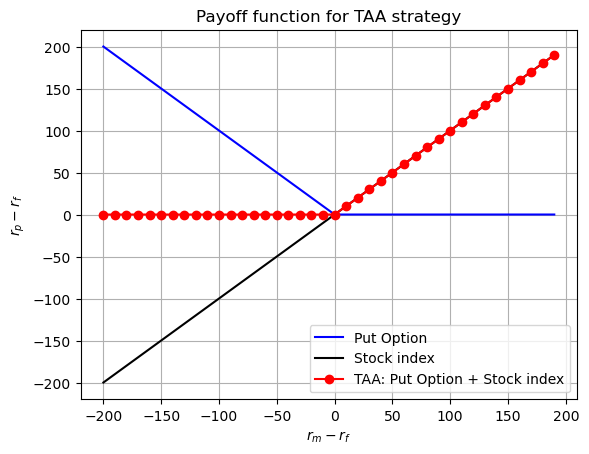

In [25]:
# TAA creates a non-linear payoff structure for the combination of put option and stock market index
F_T = 0
S_Ts = np.arange(-200,200,10)
put_payoff = [np.max([F_T - S_t,0]) for S_t in S_Ts]
stock_payoff = S_Ts
put_stock_payoff = [put + stock for put,stock in zip(put_payoff,stock_payoff)]
# plot the payoff of the put option, the stock market and the put option plus stock market
fig, ax = plt.subplots()
ax.plot(S_Ts, put_payoff, label='Put Option', color = 'blue')
ax.plot(S_Ts, stock_payoff, label='Stock index', color = 'black')
ax.plot(S_Ts, put_stock_payoff, label='TAA: Put Option + Stock index', color = 'red', marker='o')
ax.set_xlabel('$r_{m} - r_{f}$')
ax.set_ylabel('$r_{p} - r_{f}$')
ax.set_title('Payoff function for TAA strategy')
ax.legend()
ax.grid()
plt.show()


We can characterize imperfect TAA skill as the manager holding the stock index plus some fraction of a put option. Merton (Journal of Business, 1981) suggests the following regression:

$$r_{pt} - r_{ft} = \alpha_{p} + \beta_{1} \times (r_{mt} - r_{ft}) + \beta_{2} \times \text{Max}\left\{0,r_{ft}-r_{mt}\right\} + e_{pt}$$

where $r_{pt}$ is the return on a portfolio applying TAA, $r_{mt}$ is the stock index return, $r_{ft}$ is the T-Bill return and $\text{Max}\left\{0,r_{ft}-r_{mt}\right\}$ is the payoff on a put option on the underlying stock index with a strike price of $r_{ft}$.

The regression results provide:

> $\beta_{1}$ is market exposure, just as in the CAPM.

> $\beta_{2}$ is the fraction of a stock index put option provided by the manager's TAA skill.

We can then do an attribution analysis, using averages over the regression sample period:

$$\text{Risk-adjusted value-added} = r_{pt} - r_{ft} - \beta_{1}\times (r_{mt} - r_{ft})$$


This risk-adjusted Value-Added can be decomposed into the following two components:

$$\text{TAA skill return} = \beta_{2} \times \text{Max}\left\{0,r_{ft}-r_{mt}\right\}$$
$$\text{Security selection skill return} = \alpha_{p}$$

Now we look at an example. The returns are:

| Quarters | $r_{pt} - r_{ft}$ | $r_{mt} - r_{ft}$ | $\text{Max}\left\{0,r_{ft}-r_{mt}\right\}$ |
|----------|-------------------|-------------------|---------------------------------------------|
| t=1      | 9%                | 11%               | 0                                           |
| t=2      | 6%                | 5%                | 0                                           |
| t=3      | 1%                | -4%               | 4%                                          |
| t=4      | 1%                | 2%                | 0                                           |
| t=5      | 3%                | 1%                | 0                                           |
| t=6      | 3%                | 4%                | 0                                           |
| t=7      | -2%               | -3%               | 3%                                          |
| t=8      | 0%                | 1%                | 0                                           |
| t=9      | 8%                | 7%                | 0                                           |
| t=10     | 0%                | -5%               | 5%                                          |
|          |                   |                   |                                             |
| Average  | 2.9%              | 1.9%              | 1.2%                                        |

We need regress $r_{pt} - r_{ft}$ on $r_{mt} - r_{ft}$ and $\text{Max}\left\{0,r_{ft}-r_{mt}\right\}$ to get $\beta_{1}$ and $\beta_{2}$.

We firstly define a regression function. 

In [26]:
# define a function for regression
# X represent risk factors, Y represent asset return
import statsmodels.api as sm

def multiple_regression(X,Y):

    # Add a constant to X
    X = sm.add_constant(X)

    # Replace NaN values with the mean of the column
    X = X.fillna(X.mean())
    Y = Y.fillna(Y.mean())

    # Fit and summarize OLS model
    results = sm.OLS(Y, X).fit()
    return results



In [27]:
# Initialize a dataframe of dimensions 10x4

# Create a DataFrame with n rows and 4 columns
n = 10
data = pd.DataFrame(index=range(n), columns=['Quarters',r'r_pt - r_ft',r'r_mt - r_ft',r'Max{0,r_ft-r_mt}'])

# Fill in the DataFrame with data
data['Quarters'] = ['t=1','t=2','t=3','t=4','t=5','t=6','t=7','t=8','t=9','t=10']
data[r'r_pt - r_ft'] = np.array([9,6,1,1,3,3,-2,0,8,0])/100
data[r'r_mt - r_ft'] = np.array([11,5,-4,2,1,4,-3,1,7,-5])/100
data[r'Max{0,r_ft-r_mt}'] = np.array([0,0,4,0,0,0,3,0,0,5])/100

# view the dataframe
data


,Quarters,r_pt - r_ft,r_mt - r_ft,"Max{0,r_ft-r_mt}"
0,t=1,0.09,0.11,0.00
1,t=2,0.06,0.05,0.00
2,t=3,0.01,-0.04,0.04
3,t=4,0.01,0.02,0.00
4,t=5,0.03,0.01,0.00
5,t=6,0.03,0.04,0.00
6,t=7,-0.02,-0.03,0.03
7,t=8,0.00,0.01,0.00
8,t=9,0.08,0.07,0.00
9,t=10,0.00,-0.05,0.05


In [28]:
# extract the mean of r_pt- rft,    r_mt - r_ft and Max{0,r_ft-r_mt}
mean_r_pt_rf = np.mean(data[r'r_pt - r_ft'])
mean_r_mt_rf = np.mean(data[r'r_mt - r_ft'])
mean_max = np.mean(data[r'Max{0,r_ft-r_mt}'])


We now regress $r_{pt} - r_{ft}$ on $r_{mt} - r_{ft}$ and $\text{Max}\left\{0,r_{ft}-r_{mt}\right\}$ to get $\beta_{1}$ and $\beta_{2}$.

In [29]:
# regress r_pt - r_ft on r_mt - r_ft and Max{0,r_ft-r_mt}

results = multiple_regression(data[[r'r_mt - r_ft',r'Max{0,r_ft-r_mt}']],data[r'r_pt - r_ft'])
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            r_pt - r_ft   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     21.78
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           0.000988
Time:                        12:12:54   Log-Likelihood:                 29.287
No. Observations:                  10   AIC:                            -52.57
Df Residuals:                       7   BIC:                            -51.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0023      0.009      0.246      0.813      -0.020       0.025
r_mt - r_ft          0.8978      0.171      5.258      0.001       0.494       1.302
Max{0,r_ft-r_mt}     0.8023      0.435      1.845      0.108      -0.226       1.830
==============================================================================
Omnibus:                        3.329   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                1.015
Skew:                           0.076   Prob(JB):                        0.602
Kurtosis:                       1.447   Cond. No.                         93.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            r_pt - r_ft   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     21.78
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           0.000988
Time:                        10:53:00   Log-Likelihood:                 29.287
No. Observations:                  10   AIC:                            -52.57
Df Residuals:                       7   BIC:                            -51.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0023      0.009      0.246      0.813      -0.020       0.025
r_mt - r_ft          0.8978      0.171      5.258      0.001       0.494       1.302
Max{0,r_ft-r_mt}     0.8023      0.435      1.845      0.108      -0.226       1.830
==============================================================================
Omnibus:                        3.329   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                1.015
Skew:                           0.076   Prob(JB):                        0.602
Kurtosis:                       1.447   Cond. No.                         93.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# extract the coefficients
beta1 = results.params[1]
beta2 = results.params[2]


This manager has systematic risk ($\beta_{1}$) of 0.897 (less than the market) and a very high fraction of a stock index put ($\beta_{2}=0.802$). The put fraction is significantly different from zero at the $10\%$ significance level. We can decompose the manager's total return of $2.9\%$ into the following: 

| Metric                      | Return |  |
|-----------------------------|-------|---|
| **Total Excess Return**              | **2.9%**  |    |
|  - Return to Systematic        | 1.71%  | $=\beta_{1}*E[r_{mt}-r_{ft}]$ |
|  - Risk-adjusted Value-Added   | 1.19%  | $= r_{pt} - r_{ft} - \beta_{1}*E[r_{mt} - r_{ft}]$|
|                                |       | |
|**Risk-adjusted Value-Added**   | **1.19%**      ||
| - TAA return                  | 0.96%  |$=\beta_{2}*E[\text{Max}\left\{0,r_{ft}-r_{mt}\right\}]$ |
| - Security Selection Return   | 0.23%  |$=\alpha$ (intercept of the regression)|


This manager added mvalue mostly through their TAA decisions, but also from stock selection.

In [19]:
# Return to systematic risk: compute beta1 * mean_r_mt_rf
return_to_systematic_risk =beta1 * mean_r_mt_rf
print(f"Return to systematic risk: {return_to_systematic_risk*100:.2f}%")

# Risk adjusted return: compute mean_r_pt_rf -  beta1 * mean_r_mt_rf 
risk_adjusted_return = mean_r_pt_rf - beta1 * mean_r_mt_rf
print(f"Risk adjusted return: {risk_adjusted_return*100:.2f}%")

# compute TAA return = beta2 * mean_max
TAA_return = beta2 * mean_max
print(f"TAA return: {TAA_return*100:.2f}%")

# compute alpha = risk-adjusted return - TAA return
alpha = risk_adjusted_return - TAA_return
print(f"Alpha: {alpha*100:.2f}%")



Return to systematic risk: 1.71%
Risk adjusted return: 1.19%
TAA return: 0.96%
Alpha: 0.23%


In [20]:
# compute the summary statistics

